# question 1

In [ ]:
#1. Using hotel_cancellation.csv Download hotel_cancellation.csv, 
#write code to estimate the treatment effects if a ‘different room is assigned’
#as the treatment indicator and interpret its effect on the room being ‘canceled’. 
#Use all the other columns as the covariates. Write your observations for the results

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.genmod as gm
import statsmodels as stat
import numpy as np

In [3]:
#response  -  cancelled 
#treatment - different room assigned 
q1 = pd.read_csv("/Users/anchalchaudhary/Downloads/hotel_cancellation.csv")

In [4]:
q1

,Unnamed: 0,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,days_in_waiting_list,different_room_assigned,is_canceled
0,3,13,2015,27,1,0,False,False
1,4,14,2015,27,1,0,False,False
2,5,14,2015,27,1,0,False,False
3,7,9,2015,27,1,0,False,False
4,8,85,2015,27,1,0,False,True
...,...,...,...,...,...,...,...,...
102889,119385,23,2017,35,30,0,False,False
102890,119386,102,2017,35,31,0,False,False
102891,119387,34,2017,35,31,0,False,False
102892,119388,109,2017,35,31,0,False,False


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
q1['is_canceled']= LabelEncoder().fit_transform(q1['is_canceled'])

In [7]:
q1['different_room_assigned']= LabelEncoder().fit_transform(q1['different_room_assigned'])

In [22]:
np.random.seed(0)

# Specify the response and treatment variables
y = q1['is_canceled']
x = q1[['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'days_in_waiting_list','different_room_assigned']]

# Fit a logistic regression model
model = sm.Logit(y, x)
result = model.fit()

# Print the treatment effect estimates
print(result.params)

Optimization terminated successfully.
         Current function value: 0.598443
         Iterations 7
lead_time                    0.005202
arrival_date_year           -0.000375
arrival_date_week_number    -0.004168
arrival_date_day_of_month   -0.001143
days_in_waiting_list         0.001325
different_room_assigned     -2.518556
dtype: float64


In [ ]:
#interpretations 
# From the results of our logistic regression, we can say that assigning customer to a different room multiplies the odds of cancellation by exp(-2.518556).
# Since the coefficient is a negative number, it actually decreases the odds of cancellation.
# The ods of cancellation gets multiplied by 0.0805 (exp(-2.518556)), compared to the customers that were not assigned to a different room.
# That is kind of counterintiuitive but might be due to the fact that customers were getting assigned to better rooms. Who knows :)

# When it comes to other covariates, all of them seem to have statistically significant effect on cancellation, except the arrival date of the month. 
# Most of the the significant variables also decrease the odds of cancellation, just like the treatment variable.(Interpretations hold the same for all variables.)
# Only the lead time seems to increase the odds of cancellation, which is understandable, since  bookings with higher lead time tend to have higher cancellation chance.

# question 2

In [18]:
#q2. For hotel_cancellation.csv Download hotel_cancellation.csv,
#now use double logistic regression to measure the effect of ‘different 
#room is assigned’ on the room being ‘canceled’..
np.random.seed(0)

y = q1['is_canceled']
d = q1['different_room_assigned']
x = q1[['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'days_in_waiting_list']]

model1 = sm.Logit(d, x).fit()
d_hat = np.array(model1.predict(x)).reshape(len(x), 1)

x2 = q1[['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'days_in_waiting_list', 'different_room_assigned']]
x_new = np.hstack((x2, d_hat))
model2 = sm.Logit(y, x_new).fit()
print(model2.summary())


Optimization terminated successfully.
         Current function value: 0.334283
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596827
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:               102894
Model:                          Logit   Df Residuals:                   102887
Method:                           MLE   Df Model:                            6
Date:                Tue, 14 Feb 2023   Pseudo R-squ.:                  0.1077
Time:                        22:19:32   Log-Likelihood:                -61410.
converged:                       True   LL-Null:                       -68825.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1    

In [ ]:
# Here, coefficient of x6 shows the treatment effect.

# After running a double logistic regression, 
#the effects of assigning customer to a different room
#weakens which is understandable. When we run a double logistic regression,
#we also make sure to consider the effects of treatment on the variable of interest,
#that is due to other covariates. After accounting for those effects, 
#assigning customer to a different room mulplies the odds of 
#cancellation by 0.0817(exp(-2.504)). It still decreases
#the odds of cancellation, but the effect is weaker compared 
#to what we found from normal logistic regression.

# question 3

In [21]:
import numpy as np
import statsmodels.api as sm

np.random.seed(0)

# Define the number of bootstrap resamples
n_resamples = 1000

# Define a function to fit the logistic regression model and return the treatment effect estimates
def fit_model(q1):
    y = q1['is_canceled']
    d = q1['different_room_assigned']
    x = q1[['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'days_in_waiting_list']]

    model1 = sm.Logit(d, x).fit()
    d_hat = np.array(model1.predict(x)).reshape(len(x), 1)

    x2 = q1[['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'days_in_waiting_list', 'different_room_assigned']]
    x_new = np.hstack((x2, d_hat))
    model2 = sm.Logit(y, x_new).fit()

    return model2.params[:-1]

# Fit the model to the original data
original_params = fit_model(q1)

# Use bootstrapping to estimate the standard error of the treatment effects
treat_effects = np.zeros((n_resamples, len(original_params)))

for i in range(n_resamples):
    # Generate a new resample of the data by randomly sampling with replacement
    resample = q1.sample(frac=1, replace=True)
    # Fit the model to the resample and store the treatment effect estimates
    treat_effects[i, :] = fit_model(resample)

# Calculate the standard error of the treatment effect estimates
treat_effects_se = treat_effects.std(axis=0, ddof=1)

# Print the standard errors of the treatment effect estimates
print('Standard errors of the treatment effects:')
print(treat_effects_se)


Optimization terminated successfully.
         Current function value: 0.334283
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596827
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.334473
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.333104
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596733
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.335224
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.598511
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.332009
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.598320
  

In [11]:
#output of q3
#Standard errors of the treatment effects:
#[2.47365091e-04 5.34290710e-05 1.05982619e-03 1.48216881e-03 6.91168193e-04]
#We generate 1000 resamples of the data,
#fit the double logistic regression model to each resample,
#and store the estimated treatment effects for each covariate.
#Finally, we calculate the standard deviation of the treatment effects 
#across the resamples as an estimate of the standard error. The output will 
#give you the standard errors for each covariate in the model.

# question 4

In [29]:
#question 4

from matplotlib.pyplot import MultipleLocator
data = pd.read_csv("/Users/anchalchaudhary/Downloads/drinking.csv")
data.describe()

,age,others,accident,suicide
count,50.000000,48.000000,48.000000,48.000000
mean,21.000000,95.672724,31.622984,12.351980
std,1.126957,3.831062,2.384977,1.063468
min,19.068493,88.427757,26.855064,10.889364
25%,20.075342,92.785928,30.116604,11.609375
50%,20.999995,95.686272,31.641135,12.201628
75%,21.924658,98.025751,33.096747,12.818973
max,22.931507,105.268350,36.385197,14.831890


In [30]:
## RDD
# Define the threshold
age_threshold = 21
Bandwidth = 1

# Split the data into two groups just above treshold and just below
below_21 = data.query("(age >= @age_threshold - @Bandwidth) and (age < @age_threshold )")
above_21 = data.query("(age <= @age_threshold + @Bandwidth) and (age >= @age_threshold )")
# Calculate the average for each group
above_average = above_21[['others', 'accident', 'suicide']].mean()
below_average = below_21[['others', 'accident', 'suicide']].mean()

# Calculating the difference between the groups
difference = above_average - below_average
print(difference)

others      6.541660
accident    1.338486
suicide     1.719078
dtype: float64


In [32]:
## “Should the legal age for drinking be reduced from 21?” 
#### Based on the results above we can clearly see that alcohol
#increased the chances of death by all three causes. 
#I don't think legal age should be reduced from 21, mainly because,
#this would mean increasing the chances of death for younger people, which is not good. 
#Since we also only looked at the very short bandwith near the age of 21(+-1),
#we can observe how as people become of drinking age their chances of death increases.
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

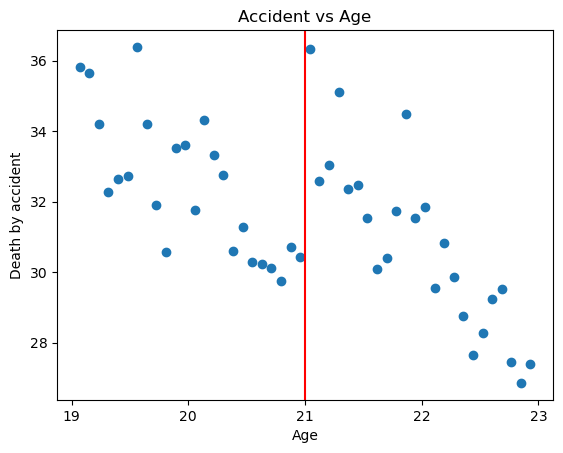

In [34]:
### Accident vs Age
age_threshold = 21  # Set the age threshold
bandwidth = 1  # Set the bandwidth

# Create a scatter plot
plt.scatter(data['age'], data['accident'])
plt.axvline(x = age_threshold, color='red')

## set the bandwidth to be 1 year (i.e., 21 +- 1)
x_major_locator = MultipleLocator(bandwidth)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

# Set the plot title and axis labels
plt.title('Accident vs Age')
plt.xlabel('Age')
plt.ylabel('Death by accident')

plt.show()

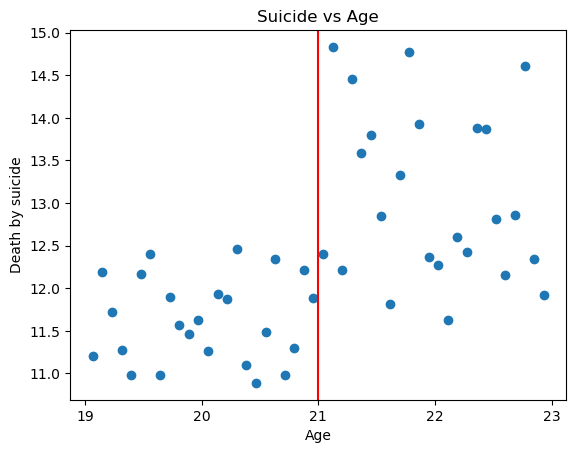

In [35]:
### Suicide vs Age
age_threshold = 21  # Set the age threshold
bandwidth = 1  # Set the bandwidth

# Create a scatter plot
plt.scatter(data['age'], data['suicide'])
plt.axvline(x = age_threshold, color='red')

## set the bandwidth to be 1 year (i.e., 21 +- 1)
x_major_locator = MultipleLocator(bandwidth)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

# Set the plot title and axis labels
plt.title('Suicide vs Age')
plt.xlabel('Age')
plt.ylabel('Death by suicide')

plt.show()

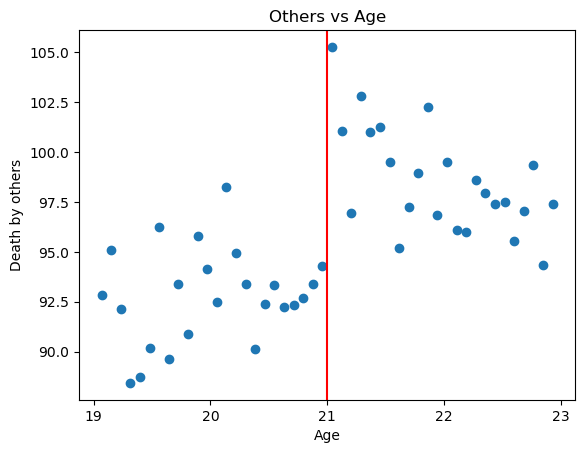

In [36]:
### Others vs Age
age_threshold = 21  # Set the age threshold
bandwidth = 1  # Set the bandwidth

# Create a scatter plot
plt.scatter(data['age'], data['others'])
plt.axvline(x = age_threshold, color='red')

## set the bandwidth to be 1 year (i.e., 21 +- 1)
x_major_locator = MultipleLocator(bandwidth)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

# Set the plot title and axis labels
plt.title('Others vs Age')
plt.xlabel('Age')
plt.ylabel('Death by others')

plt.show()

In [ ]:
# We can clearly see from all of the graphs above, right around the age of 21, within very short bandwidth, the chances of death increase very significantly by all 3 causes. This is a prime example of Regression discontinuity and how we can observe the treatment effect of drinking age, again very close to the age of 21 since we want to minimize the effect of other covariates that might also be increasing the chance of death
# What might be the effect of choosing a smaller bandwidth?  What if we chose the maximum bandwidth?
# In Regression discontinuity, we try to observe and measure the effeect of some treatment, drinking age in our case, on some variable of interest, chance of death in our case. When measuring treatment effect we want to choose the bandwith around the treshold as small as possible to minimize the effects of other covariates that might be affecting the variable of interest, and measure exactly the effect of treatment. If we increase bandwidth around the treshold we will also be increasing the effects of other covariates that might affect the variable of death, and decrease the accuracy of our measurement of treatment effect.


# question 5


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

In [38]:
## import the dataset
data5 = pd.read_csv("/Users/anchalchaudhary/Downloads/iris.csv")
data5.head()
X = data5.iloc[:, :-1]
y = data5.iloc[:, -1]


In [39]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 7)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


# Define the range of values of k to test
k_values = [1, 3, 5, 7]

# Loop over the values of k and fit a KNN model to the training set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, np.ravel(y_train))
    predict = knn.predict(X_test)
    
    # Evaluate the model on the testing set
    accuracy = accuracy_score(predict, y_test)
    print(f"k = {k}: accuracy = {accuracy:.5f}")
    ##The accuracy score for k = 1, 3, 5 is 0.92105, and the accuracy score for k = 7 is 0.94737

k = 1: accuracy = 0.92105
k = 3: accuracy = 0.92105
k = 5: accuracy = 0.92105
k = 7: accuracy = 0.94737


/Users/anchalchaudhary/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/anchalchaudhary/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

In [40]:
## use cross-validation method to choose the optimal k
k_values = [1, 3, 5, 7]
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    accuracy = cross_val_score(clf, X_train, y_train, cv = 10)
    print(f"k = {k}: accuracy = {accuracy.mean():.5f}")
#we choose k = 7 as Cross Validation also shows that k=7 has the highest accuracy

/Users/anchalchaudhary/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/anchalchaudhary/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

k = 1: accuracy = 0.94621
k = 3: accuracy = 0.95455
k = 5: accuracy = 0.96364


/Users/anchalchaudhary/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/anchalchaudhary/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

k = 7: accuracy = 0.97273


/Users/anchalchaudhary/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/anchalchaudhary/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

In [41]:
# Which distance/similarity metric did you choose to use and why?
# set k = 3 and compare different distance metric

# euclidean_distances
clf = KNeighborsClassifier(n_neighbors = 7, metric='euclidean')
accuracy = cross_val_score(clf, X_train, y_train, cv = 10)
print(f"k = 7: euclidean distance accuracy = {accuracy.mean():.5f}")

#manhattan_distances
clf = KNeighborsClassifier(n_neighbors = 7, metric='manhattan')
accuracy = cross_val_score(clf, X_train, y_train, cv = 10)
print(f"k = 7: manhattan distance accuracy = {accuracy.mean():.5f}")

# cosine_distances
clf = KNeighborsClassifier(n_neighbors = 7, metric='cosine')
accuracy = cross_val_score(clf, X_train, y_train, cv = 10)
print(f"k = 7: cosine distance accuracy = {accuracy.mean():.5f}")

#nan_euclidean_distances
clf = KNeighborsClassifier(n_neighbors = 7, metric='nan_euclidean')
accuracy = cross_val_score(clf, X_train, y_train, cv = 10)
print(f"k = 7: nan_euclidean distance accuracy = {accuracy.mean():.5f}")

/Users/anchalchaudhary/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/anchalchaudhary/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

k = 7: euclidean distance accuracy = 0.97273
k = 7: manhattan distance accuracy = 0.97273
k = 7: cosine distance accuracy = 0.86667
k = 7: nan_euclidean distance accuracy = 0.97273


/Users/anchalchaudhary/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/anchalchaudhary/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

In [43]:
# It seems like for k=7 accuracy for eucledean,
#manhattan and nan_euclidean metrics is the same.  
# Cosine distance however, shows a bit lower accuracy for k=7
#I choose eucledean because it is easy to interpret, best for continous variable and most common.